# Properties of Scalar First Order Linear Systems

## First order linear systems

A simple, generic model for a first-order linear system with one state is given in the form

$$\frac{dx}{dt} = ax + bu$$

where $x$ is a **state variable** such as temperature, pressure, composition, and $u$ is a time-varying **input** that causes changes in the state. Despite its simplicity, a single first-order model captures some essential characteristics of simple systems that are often a starting point for control systems design.

This notebook reviews the dynamics and behavior of these systems.

## Steady-State Gain

The steady-state response of a system is the value of the state variable ultimately attained when the input is held constant. If we denote the steady-state values of $x$ and $u$ as 

$$\begin{align*}
\bar{x} & = \lim_{t\rightarrow\infty} x(t) \\
\bar{u} & = \lim_{t\rightarrow\infty} u(t)
\end{align*}$$

The state is steady if the state variable is not changing, i.e.,  

$$\frac{d\bar{x}}{dt} = 0$$

which provides an equation to define the relationship between the steady input and the steady state,

$$0 = a \bar{x} + b \bar{u} \implies \bar{x} = -\frac{b}{a}\bar{u}$$

The value $-\frac{b}{a}$ is sometimes called the **gain**, which is a coefficient showing how much the steady state $\bar{x}$ changes due to a change $\bar{u}$.

$$\bar{x} = K \bar{u} \qquad\text{where}\qquad K = -\frac{b}{a}$$

Note that $K$ may have units in many process applications. For example, if $x$ denotes concentration of a chemical species in mg/liter and $u$ denotes a input flow in units of mg/hour, then the units of $K$ would be hours/liter. 

In many electrical engineering applications, however, $x$ and $u$  refer to electrical potential measured in volts or current measured in amperes. In these cases the gain $K$ will be dimensionless. Because of thie, the issue of whether or not the gain has units can be a source of misunderstanding among engineering disciplines, and is something to document carefully when working in cross-disciplinary teams.

<hr>

**Example:** The velocity of a car, $x$, in response to a throttle setting $u$ has been found to satisfy the equation

$$\frac{dx}{dt} = - 0.12 x + 0.096 u$$

where the units of $t$ are in seconds. Speed is measured in miles per hour and throttle position in percent of full scale. 

* a. What are the units of $x$ and $u$?
* b. What are the units of the $a$ and $b$ coeffients?
* c. What is value and units of the steady-state gain? 
* d. What is the maximum speed of the car?

<hr>

Text(60, 32.0, 'K = 0.80')

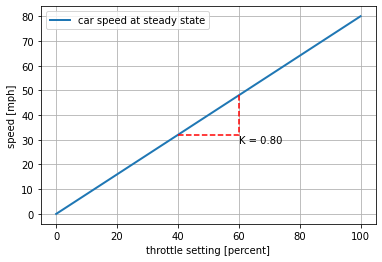

In [38]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# system data
a = -0.12
b = 0.096
K = -b/a

# plot steady state response
u_ss = np.linspace(0, 100)
x_ss = K*u_ss

fig, ax = plt.subplots(1, 1)
ax.plot(u_ss, x_ss, label="car speed at steady state", lw=2)
ax.set_xlabel("throttle setting [percent]")
ax.set_ylabel("speed [mph]")
ax.legend()
ax.grid(True)

ua = 40
ub = 60
ax.plot([ua, ub, ub], [K*ua, K*ua, K*ub], "r--", 2)
ax.text(ub, K*ua, f"K = {K:4.2f}", va="top")

## Dynamic Response

The dynamic response of a scalar first order system is the superposition of two parts, a response to an initial condition plus a response to a non-zero input. Let's consider each of these separately.

### Response to an Initial Condition

For the case when $u(t) = 0$, the scalar first order system becomes

$$\frac{dx}{dt} = ax$$

If the value $x_0 = x(t_0)$ is known at $t_0$, then the solution to this differential equation is

$$x(t) = x_0 e^{a(t - t_0)}$$

There are three important cases:

* $a \leq 0$: **exponential decay** to zero.
* $a = 0$: x(t) **constant** with a value $x(t_0)$
* $a \geq 0$: **exponential increase** to either $+\infty$ or $-\infty$, depending on the sign of $x(t_0)$.

<hr>

**Example:** Let's continue with the example of the car. Suppose you are driving at a steady speed of 60 mph then take your foot off the throttle at $t = 20$ seconds.

* a.) What was the initial throttle setting before 20 seconds?
* b.) What is the throttle setting after 20 seconds?
* c.) For the purposes for determining the response after 20 seconds, what is the initial condition?
* d.) Is the response exponentially decaying, constant, or exponentially increasing?

<hr>

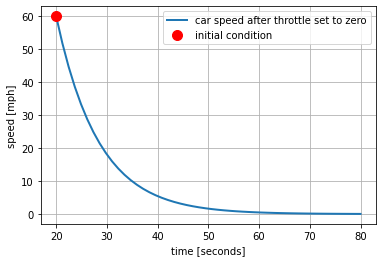

In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# system data
a = -0.12
t0 = 20.0
x0 = 60.0

t = np.linspace(t0, t0 + 60)
x = x0*np.exp(a*(t-t0))

fig, ax = plt.subplots(1, 1)
ax.plot(t, x, label="car speed after throttle set to zero", lw=2)
ax.plot(t0, x0, 'r.', ms=20, label="initial condition")
ax.set_xlabel("time [seconds]")
ax.set_ylabel("speed [mph]")
ax.legend()
ax.grid(True)

### Time constant

The system parameter $a$ has units of inverse time. There is a **characteristic time constant** that can be defined as

$$\tau = -\frac{1}{a} \qquad\iff\qquad a = -\frac{1}{\tau}$$

With this definition, an alternative formulation of the model and response can be given by

$$\frac{dx}{dt} = -\frac{1}{\tau} \implies x(t) = x(t_0) e^{-\frac{(t-t_0)}{\tau}}$$

<hr>

**Example:** For the car example, what is the value of the time constant?
<hr>

Knowledge of the time constant provides a simple means of sketching the response of first order linear system subject to a a sudden change. The following table shows the response of a first order system as a fraction of the initial condition.

| $t$ |  $\frac{x(t)}{x_0}$ | 1 - $\frac{x(t)}{x_0}$ |
| :---: | :---: | :---: |
| $t_0$ | 1.000 | 0.000 |
| $t_0 + \tau$ | 0.368 | 0.632 |
| $t_0 + 2\tau$ | 0.135 | 0.865 |
| $t_0 + 3\tau$ | 0.050 | 0.950 |
| $t_0 + 4\tau$ | 0.018 | 0.982 |

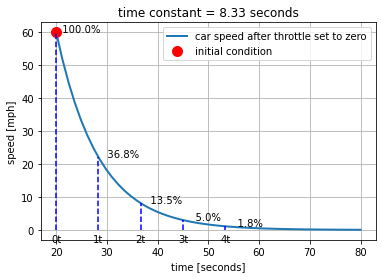

In [61]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# system data
a = -0.12
tau = -1.0/a

t0 = 20.0
x0 = 60.0

t = np.linspace(t0, t0 + 60)
x = x0*np.exp(-(t-t0)/tau)

fig, ax = plt.subplots(1, 1)
ax.plot(t, x, label="car speed after throttle set to zero", lw=2)
ax.plot(t0, x0, 'r.', ms=20, label="initial condition")
ax.set_xlabel("time [seconds]")
ax.set_ylabel("speed [mph]")
ax.set_title(f"time constant = {tau:4.2f} seconds")
ax.legend()
for  k in range(0, 5):
    ax.plot([t0 + k*tau, t0 + k*tau], [0, x0*np.exp(-k)], "b--")
    ax.text(t0 + k*tau, -0.02*x0, f"{k}t", va="top", ha="center")
    ax.text(t0 + k*tau, x0*np.exp(-(k*tau)/tau), f"  {100*np.exp(-k):5.1f}%")
ax.grid(True)

### Half-life

The characteristic time constant $\tau$ defined above has a natural relationship with the parameters appearing in the problem statement and model. That time constant is equal to time $t - t_0 = \tau$ necessary for the response to decay to a fraction $e^{-\frac{(t-t_0)}{\tau}} = e^{-1} = 1/e = 0.368$ of the starting value. 

Another commonly used benchmark is to define a period of time necessary for the response to decay to 1/2 of the starting value.  This is called the **half-life**, or $\tau_{1/2}$. To find the relationship to $\tau$, w

$$ 0.5 = e^{-\frac{\tau_{1/2}}{\tau}} \implies \tau_{1/2} = - \tau \ln(0.5)$$

or 

$$\tau_{1/2} = 0.693\tau$$

The half-life is an easy benchmark to identify from a sketch of experimental data. 

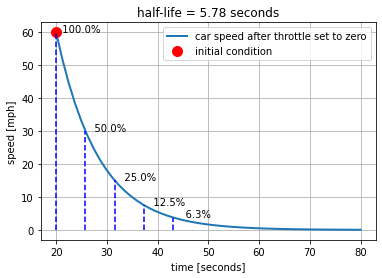

In [96]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# system data
a = -0.12
tau = -1.0/a
tau_half = 0.693*tau

t0 = 20.0
x0 = 60.0

t = np.linspace(t0, t0 + 60)
x = x0*np.exp(-(t-t0)/tau)

fig, ax = plt.subplots(1, 1)
ax.plot(t, x, label="car speed after throttle set to zero", lw=2)
ax.plot(t0, x0, 'r.', ms=20, label="initial condition")
ax.set_xlabel("time [seconds]")
ax.set_ylabel("speed [mph]")
ax.set_title(f"half-life = {tau_half:4.2f} seconds")
ax.legend()
for k in range(0, 5):
    ax.plot([t0 + k*tau_half, t0 + k*tau_half], [0, x0*np.exp(-k*tau_half/tau)], "b--")
    ax.text(t0 + k*tau_half, x0*np.exp(-(k*tau_half)/tau), f"  {100*np.exp(-k*tau_half/tau):5.1f}%")
ax.grid(True)


<hr>

**Example:** The following cell simulates an experimental measurement of the response of car. From this data, estimate:

* a.) The half-life $\tau_{1/2}$
* b.) The characteristic time constant $\tau$.
* c.) The parameter $a$ for the model $\frac{dx}{dt} = ax$

<hr>

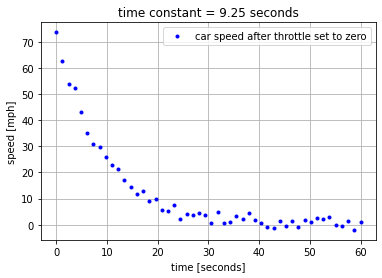

In [79]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# system data
a = -np.random.uniform(0.05, 0.20)

t0 = 0.0
x0 = np.random.uniform(40, 80)

tau = -1.0/a

t = np.linspace(t0, t0 + 60)
x = x0*np.exp(-(t-t0)/tau) + 2.0*np.random.normal(size=len(t))

fig, ax = plt.subplots(1, 1)
ax.plot(t, x, 'b.', label="car speed after throttle set to zero")
ax.set_xlabel("time [seconds]")
ax.set_ylabel("speed [mph]")
ax.set_title(f"time constant = {tau:4.2f} seconds")
ax.legend()
ax.grid(True)

### Step Inputs

The **Heaviside step function** is a function of time that changes discontinuously from 0 to 1 at $t=0$. The `numpy` library provides a useful implementation that is demonstrated in the following cell.

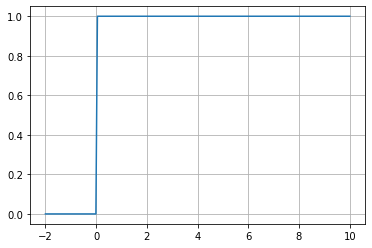

In [109]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-2, 10, 200)
u = np.heaviside(t, 0.5)

fig, ax = plt.subplots(1, 1)
ax.plot(t, u)
ax.grid(True)

This function is easily adapted to create a step function of arbitrary size, offset, and location in time.

<hr>

**Example:** Create a step input for the car throttle corresponding to change from 25% throttle to 75% throttle at $t = 20$ seconds.

<hr>

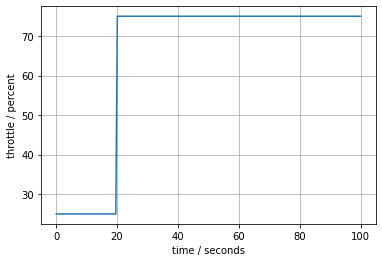

In [112]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

t0 = 20.0
ua = 25.0
ub = 75.0

t = np.linspace(0, 100, 200)
u = ua + (ub - ua)*np.heaviside(t - t0, 0.5)

fig, ax = plt.subplots(1, 1)
ax.plot(t, u)
ax.set_xlabel("time / seconds")
ax.set_ylabel("throttle / percent")
ax.grid(True)

## Response to a step input

Now let's consider the response of a linear first order system

$$\frac{dx}{dt} = a x + b u$$

to a time-varying input $u(t)$ given an initial value $x_0$ known at time 0. The general solution to our equation is

$$x(t) = x_0 e^{at} + \int_{0}^t e^{a(t - t')} b u(t') dt'$$

where $t'$ is the variable on integration. 

If $u(t) = U$ is constant for $t \geq 0$, then

$$x(t) = x_0 e^{at} - \frac{b}{a} U \left[1 - e^{a t}\right]$$

Translating in time to $t_0$, for any $t > t_0$


$$x(t) = x_0 e^{a(t-t_0)} - \frac{b}{a} U \left[1 - e^{a (t-t_0)}\right]$$



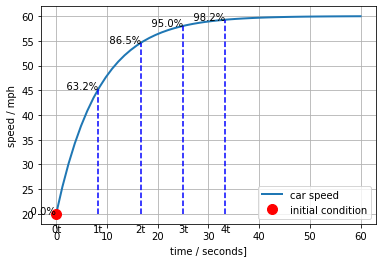

In [126]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# system data
a = -0.12
b = 0.096
U = 75.0

t0 = 0.0
x0 = 20.0

t = np.linspace(t0, t0 + 60)
x = x0*np.exp(a*(t-t0)) - (b*U/a)*(1 - np.exp(a*(t-t0)))

fig, ax = plt.subplots(1, 1)
ax.plot(t, x, label="car speed", lw=2)
ax.plot(t0, x0, 'r.', ms=20, label="initial condition")
ax.set_xlabel("time / seconds]")
ax.set_ylabel("speed / mph")
ax.legend()
tau = -1/a
for  k in range(0, 5):
    t = t0 + k*tau
    x = x0*np.exp(a*(t-t0)) - (b*U/a)*(1 - np.exp(a*(t-t0)))
    ax.plot([t, t], [x0, x], "b--")
    ax.text(t, x0-2, f"{k}t", va="top", ha="center")
    ax.text(t, x, f"  {100*(1-np.exp(-k)):5.1f}%", ha="right")
ax.grid(True)

## Alternative forms for scalar first-order linear systems

We started with a scalar, linear first-order system in the form

$$\frac{dx}{dt} = a x + b u$$

with initial condition $x_0 = x(t_0)$. For a step input with value $U$ for $t > t_0$, we found a general solution

$$x(t) = x_0 e^{a(t-t_0)} - \frac{b}{a} U \left[1 - e^{a (t-t_0)}\right]$$

We also found two key parameters that describe the behavior of this systems in terms that can be easily indentified from a plot of the step response, the time constant $\tau$ and gain $K$.

$$\begin{align*}
\tau & = -1/a \\
K & = - \frac{b}{a}
\end{align*}$$

Obviously, once $K$ and $tau$ are estimated, values for $a$ and $b$ are easily computed. But sometimes it is more transparent simply to write the linear system using $K$ and $\tau$ directly, as

$$\tau\frac{dx}{dt} = -x + K u$$